In [178]:
import pandas as pd
import twint
from pytrends.request import TrendReq
pytrends = TrendReq(backoff_factor=0.5)
%run -i 'mod5_functions.py'
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Once this notebook has been used once, you can skip over this data initialization. If all steps were done in the same order, you'll end up with a `master_series.csv` which you can load and process.

---

In [7]:
# Using a custom function to utilize pytrends to get me the interest index
## From Google Trends Pseudo-API over a specified period of time
### Timeframe format --> 'YYYY-MM-DD YYYY-MM-DD' --> 'early recent'
# This one got '2000-01-01 current_date'
# indoor_farming = get_int('indoor farming', '2000-01-01 2020-05-16')
# Saving this data
# indoor_farming_int.to_csv('indoor_farming_interest')

# Saved the csv before
indoor_farming = pd.read_csv('indoor_farming_interest')
indoor_farming['date'] = pd.to_datetime(indoor_farming['date'])
indoor_farming.set_index('date', inplace=True)

Going to build a `pytrends` payload for the term **indoor farming** and return some of the related topics.

In [8]:
pytrends.build_payload(['indoor farming'], geo='US')

In [35]:
pytrends.related_topics()

{'indoor farming': {'rising':     value formattedValue                                               link  \
  0   99400       Breakout  /trends/explore?q=/g/11c5sr5trf&date=today+5-y...   
  1   83900       Breakout  /trends/explore?q=/m/03fp41&date=today+5-y&geo=US   
  2   77550       Breakout  /trends/explore?q=/m/09y4pm&date=today+5-y&geo=US   
  3   77550       Breakout  /trends/explore?q=/m/0642w22&date=today+5-y&ge...   
  4   77450       Breakout   /trends/explore?q=/m/0fqlj&date=today+5-y&geo=US   
  5   66300       Breakout   /trends/explore?q=/m/09dv7&date=today+5-y&geo=US   
  6   66250       Breakout   /trends/explore?q=/m/03rnh&date=today+5-y&geo=US   
  7   66050       Breakout  /trends/explore?q=/m/015n_w&date=today+5-y&geo=US   
  8   55350       Breakout  /trends/explore?q=/m/04n7m2q&date=today+5-y&ge...   
  9   46650       Breakout    /trends/explore?q=/m/0t8t&date=today+5-y&geo=US   
  10  46400       Breakout  /trends/explore?q=/m/03b848&date=today+5-y&geo=US   


Gathering data on related topics to indoor farming. The goal is to average all of the values together to get a topic wide understanding of the trends.  
  
I will be using the `get_int()` function from before to gather the data, and then save it into a csv for future use.

In [9]:
greenhouse_int = get_int('greenhouse', '2000-01-01 2020-05-16')

In [8]:
greenhouse_int.to_csv('greenhouse.csv')

In [ ]:
greenhouse = pd.read_csv('greenhouse.csv')
greenhouse['date'] = pd.to_datetime(greenhouse['date'])
greenhouse.set_index('date', inplace=True)



In [10]:
hydroponics_int = get_int('hydroponic','2000-01-01 2020-05-16')
# hydroponics_int.to_csv('hydroponics.csv')

In [11]:
vfarm_int = get_int('vertical farming', '2000-01-01 2020-05-16')
# vfarm_int.to_csv('final_vfarm.csv')

In [12]:
urban_int = get_int('urban agriculture', '2000-01-01 2020-05-16')
# urban_int.to_csv('urban_final.csv')

In [13]:
aeroponics_int = get_int('aeroponics', '2000-01-01 2020-05-16')
# aeroponics_int.to_csv('aeroponics.csv')

In [59]:
greenhouse_int = pd.read_csv('greenhouse.csv')
greenhouse_int['date'] = pd.to_datetime(greenhouse_int['date'])
greenhouse_int.set_index('date', inplace=True)

vfarm_int = pd.read_csv('final_vfarm.csv')
vfarm_int['date'] = pd.to_datetime(vfarm_int['date'])
vfarm_int.set_index('date', inplace=True)

hydroponics_int = pd.read_csv('hydroponics.csv')
hydroponics_int['date'] = pd.to_datetime(hydroponics_int['date'])
hydroponics_int.set_index('date', inplace=True)

urban_int = pd.read_csv('urban_final.csv')
urban_int['date'] = pd.to_datetime(urban_int['date'])
urban_int.set_index('date', inplace=True)

aeroponics_int = pd.read_csv('aeroponics.csv')
aeroponics_int['date'] = pd.to_datetime(aeroponics_int['date'])
aeroponics_int.set_index('date', inplace=True)

In [14]:
# Going to average these series together to get a whole topic understanding
master = (aeroponics_int['aeroponics']+urban_int['urban agriculture']+vfarm_int['vertical farming']+
          hydroponics_int['hydroponic']+indoor_farming['indoor farming']+
          greenhouse_int['greenhouse'])/6

In [15]:
master = master.to_frame()
master = rename_column(master, 0, 'interest')

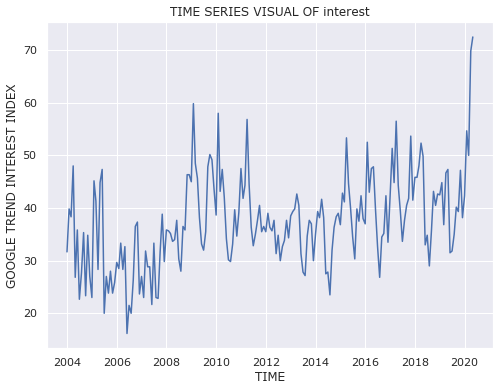

In [119]:
nice_plot(master, 'interest')

---

### Loading the previously saved csv

In [63]:
# master.to_csv('master_series.csv')

In [104]:
master = pd.read_csv('master_series.csv')
master['date'] = pd.to_datetime(master['date'])
master.set_index('date', inplace=True)

In [105]:
gen_dftest(master, 'interest')

Test Stat                -0.457238
P-Value                   0.900095
# Lags                   12.000000
# Observations          112.000000
Critical Value (1%)      -3.490131
Critical Value (5%)      -2.887712
Critical Value (10%)     -2.580730
dtype: float64

The data that I have compiled, top five related terms to **indoor farming**, is not a stationary time series.

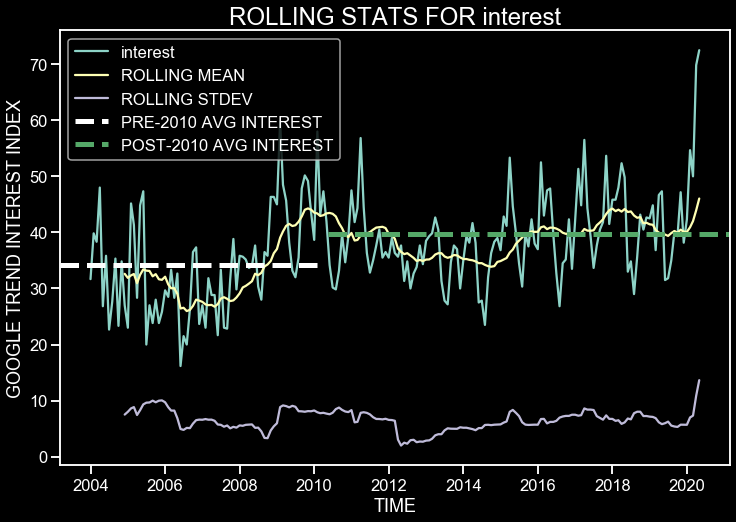

In [176]:
rolling_stats(master, 'interest', 12)

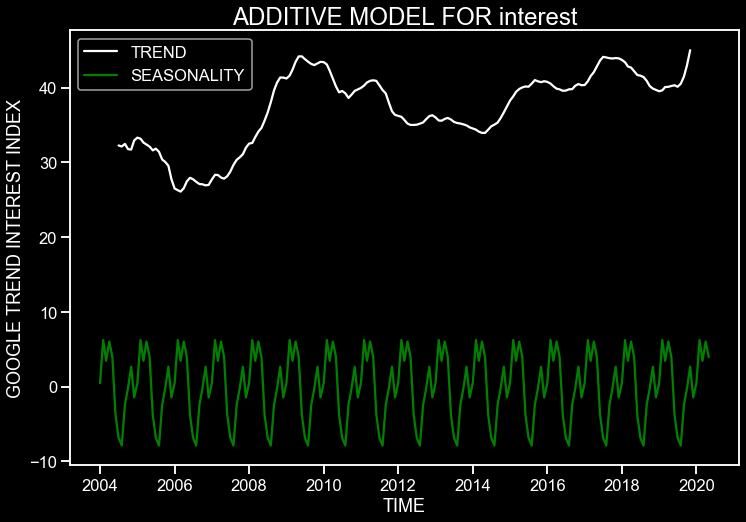

In [179]:
szn_decomp(master, 'interest', model=['additive'],
           graphs=['trend', 'szn'])

Quite a bit of seasonality in this data. Will be taking this into consideration as I converge on a final model.

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

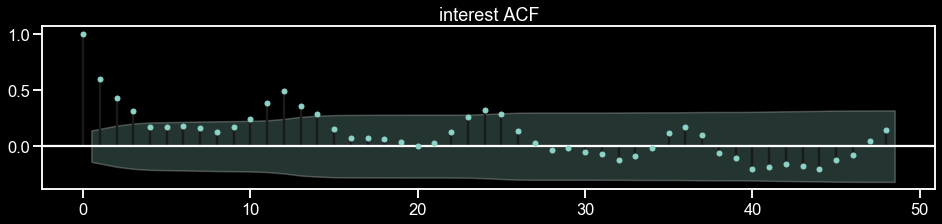

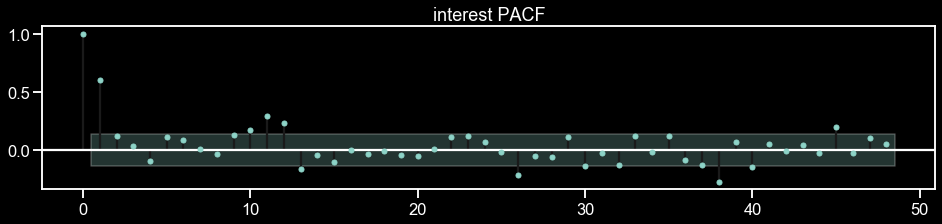

In [180]:
auto_corrs(master, 'interest')

---

Due to the seasonality of this data, I am going to make a preliminary model with parameters loosely based on the previous EDA. Based on these visuals it seems to have an annual seasonality going on, setting m=12.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -391.418
Date:                            Mon, 18 May 2020   AIC                            792.836
Time:                                    22:02:52   BIC                            806.732
Sample:                                01-01-2004   HQIC                           798.479
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0507      0.116      0.437      0.662      -0.176       0.278
ma.L1         -0.7601      0.089   

Text(0.5, 1.0, 'SARIMA MODEL')

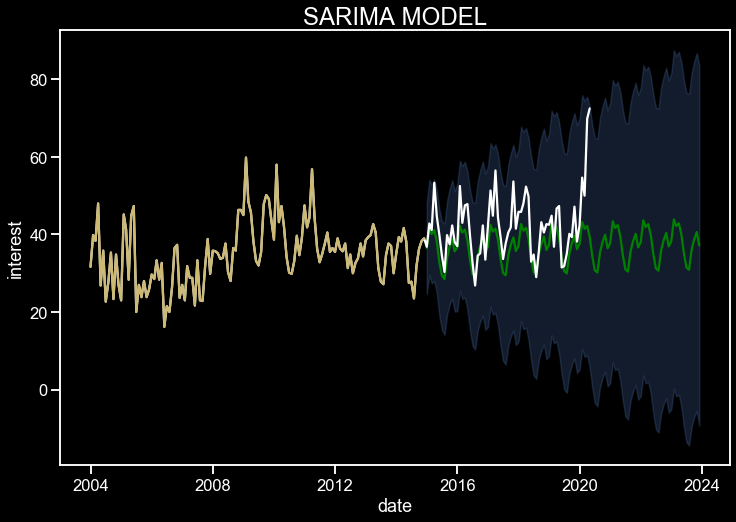

In [182]:
model = SARIMAX(master['2000':'2014'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
fit = model.fit()
print(fit.summary())
forecast = fit.forecast(108)
print('Forecasting 108 months into the future from the\ntraining data (2015-2024).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
forecasted = pred.predicted_mean
prediction = fit.get_forecast(steps=108)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2000':].index,
             y=master['2000':]['interest'], color='w')
sns.lineplot(x=master['2000':'2014'].index,
             y=master['2000':'2014']['interest'], color='y')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='b', alpha=0.25)
plt.title(f'SARIMA MODEL', size=24)

This model's AIC score is:  792.83601651001
This model's BIC score is:  806.7316339755677
This model's RMSE on test data is:  7.959551452954634


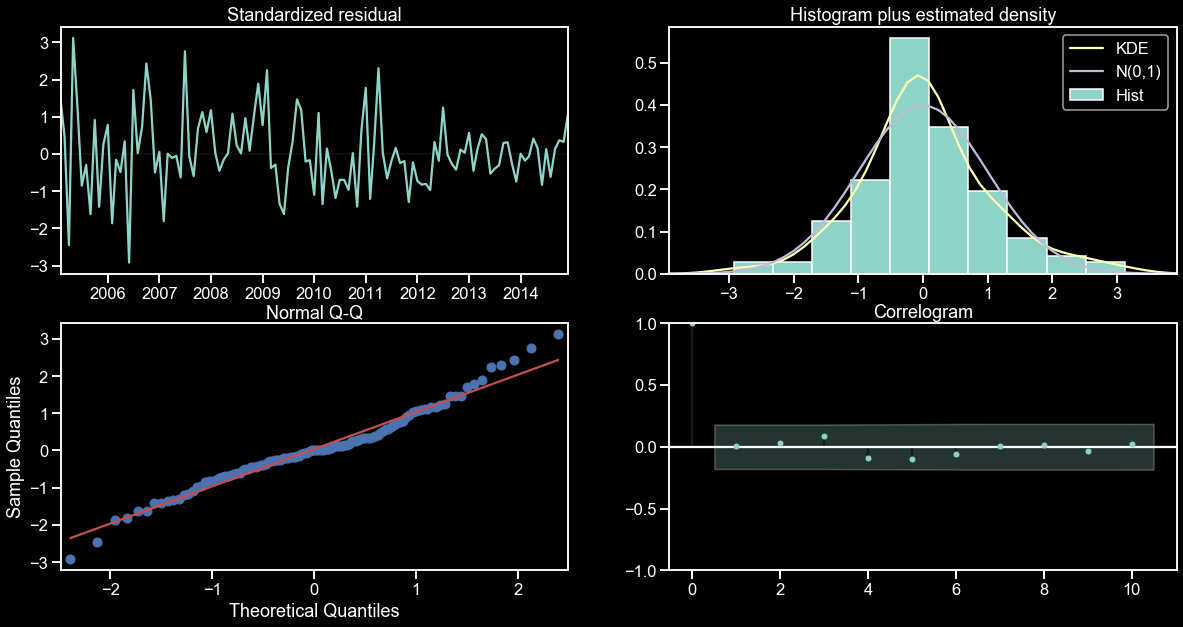

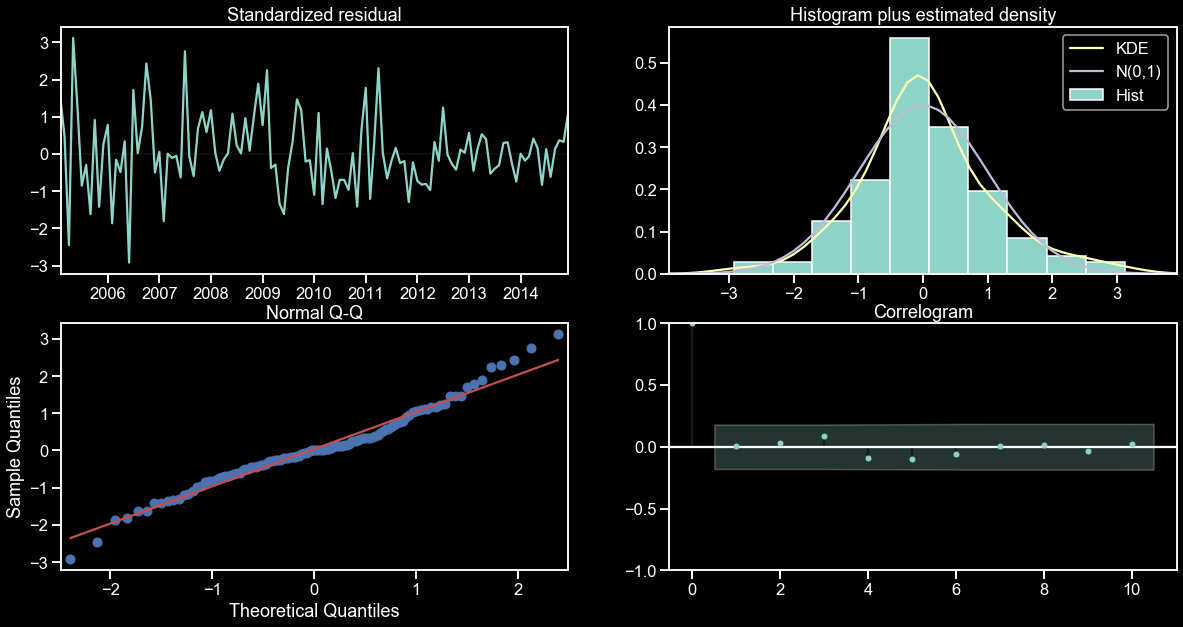

In [183]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

---

Now going to try a model that has no AR, MA, or seasonal components other than differencing.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -436.290
Date:                            Mon, 18 May 2020   AIC                            874.581
Time:                                    22:03:40   BIC                            877.360
Sample:                                01-01-2004   HQIC                           875.709
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        89.5374      7.847     11.410      0.000      74.157     104.918
Ljung-Box (Q):                     

Text(0.5, 1.0, 'SARIMA MODEL')

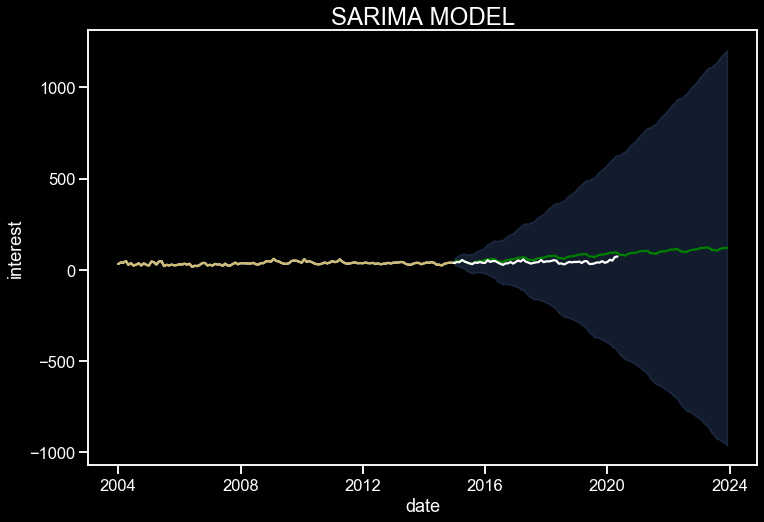

In [185]:
model2 = SARIMAX(master['2000':'2014'], order=(0,1,0), seasonal_order=(0, 1, 0, 12))
fit = model2.fit()
print(fit.summary())
forecast = fit.forecast(108)
print('Forecasting 108 months into the future from the\ntraining data (2015-2024).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
forecasted = pred.predicted_mean
prediction = fit.get_forecast(steps=108)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2000':].index,
             y=master['2000':]['interest'], color='w')
sns.lineplot(x=master['2000':'2014'].index,
             y=master['2000':'2014']['interest'], color='y')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='b', alpha=0.25)
plt.title(f'SARIMA MODEL', size=24)

This model's AIC score is:  874.5807226462764
This model's BIC score is:  877.359846139388
This model's RMSE on test data is:  10.052178811686685


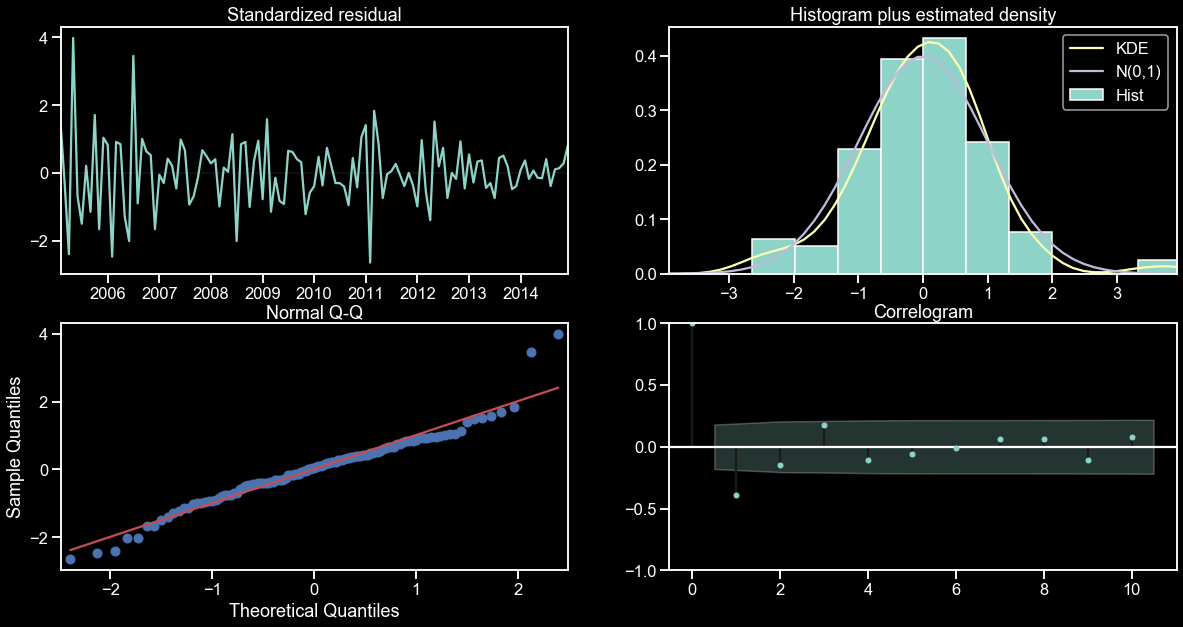

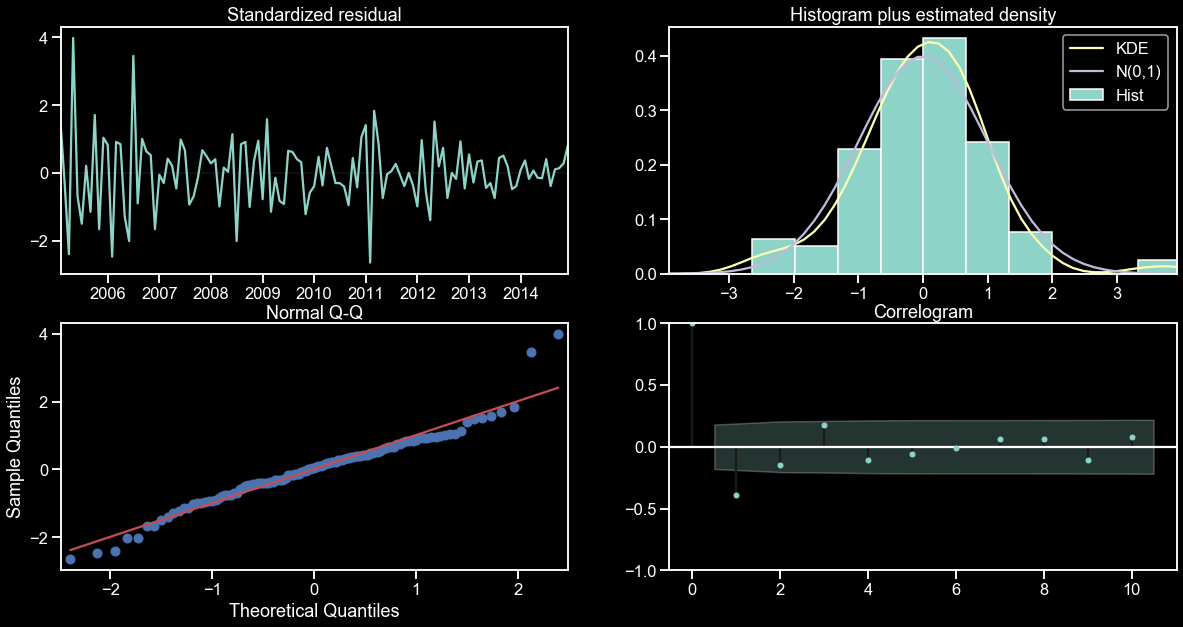

In [186]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

Not as good as previous naive model.

---

Now to use `auto_arima` to find the best params for final model.

In [191]:
# Searching for best params
model3 = auto_arima(master['2000':'2014'], trace=True, start_p=0, start_q=0,
                  start_P=0, start_Q=0, seasonal=True, m=12, suppress_warnings=True, 
                   D=1, error_action='ignore', approximation=False, random_state=42)
fitted = model3.fit(master['2000':'2014'], disp=0)

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=852.469, BIC=858.044, Time=0.036 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=832.732, BIC=843.882, Time=0.234 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=821.678, BIC=832.828, Time=0.583 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=850.547, BIC=853.335, Time=0.016 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=838.967, BIC=847.329, Time=0.053 seconds
Fit ARIMA(1,0,0)x(2,1,0,12) [intercept=True]; AIC=825.079, BIC=839.016, Time=0.790 seconds
Fit ARIMA(1,0,0)x(2,1,1,12) [intercept=True]; AIC=803.953, BIC=820.678, Time=2.212 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
F

In [192]:
best_params = fitted.get_params()
print('\n\nThe best order parameters are {},{}\n'.format(best_params['order'],best_params['seasonal_order']))



The best order parameters are (3, 0, 0),(2, 1, 1, 12)



/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                      SARIMAX Results                                       
Dep. Variable:                             interest   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(2, 1, [1], 12)   Log Likelihood                -390.433
Date:                              Mon, 18 May 2020   AIC                            796.866
Time:                                      22:08:47   BIC                            819.166
Sample:                                  01-01-2004   HQIC                           805.922
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0025      0.004      0.610      0.542      -0.005       0.010
ar.L1          0.30

Text(0.5, 1.0, 'SARIMA MODEL')

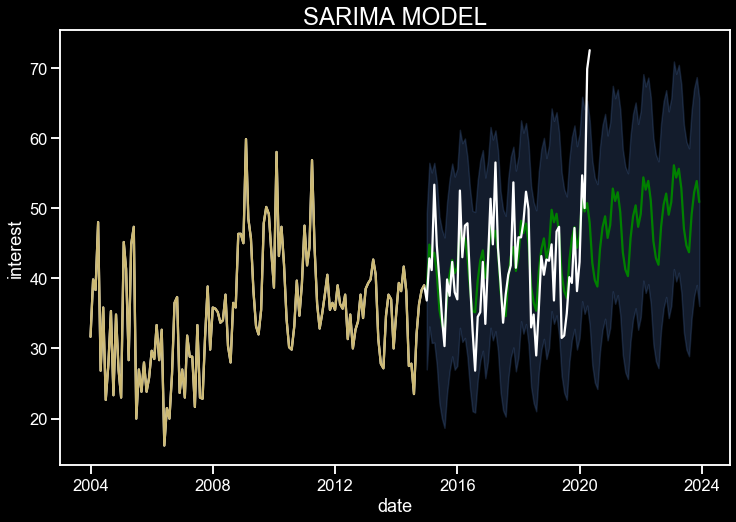

In [193]:
model4 = SARIMAX(master['2000':'2014'], order=(3,0,0), seasonal_order=(2,1,1,12),
                trend='t')
fit = model4.fit()
print(fit.summary())
forecast = fit.forecast(108)
print('Forecasting 108 months into the future from the\ntraining data (2015-2024).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
forecasted = pred.predicted_mean
prediction = fit.get_forecast(steps=108)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2000':].index,
             y=master['2000':]['interest'], color='w')
sns.lineplot(x=master['2000':'2014'].index,
             y=master['2000':'2014']['interest'], color='y')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='b', alpha=0.25)
plt.title(f'SARIMA MODEL', size=24)

How about RMSE?

This model's AIC score is:  796.8657811771068
This model's BIC score is:  819.1657151193632
This model's RMSE on test data is:  11.905015753722862


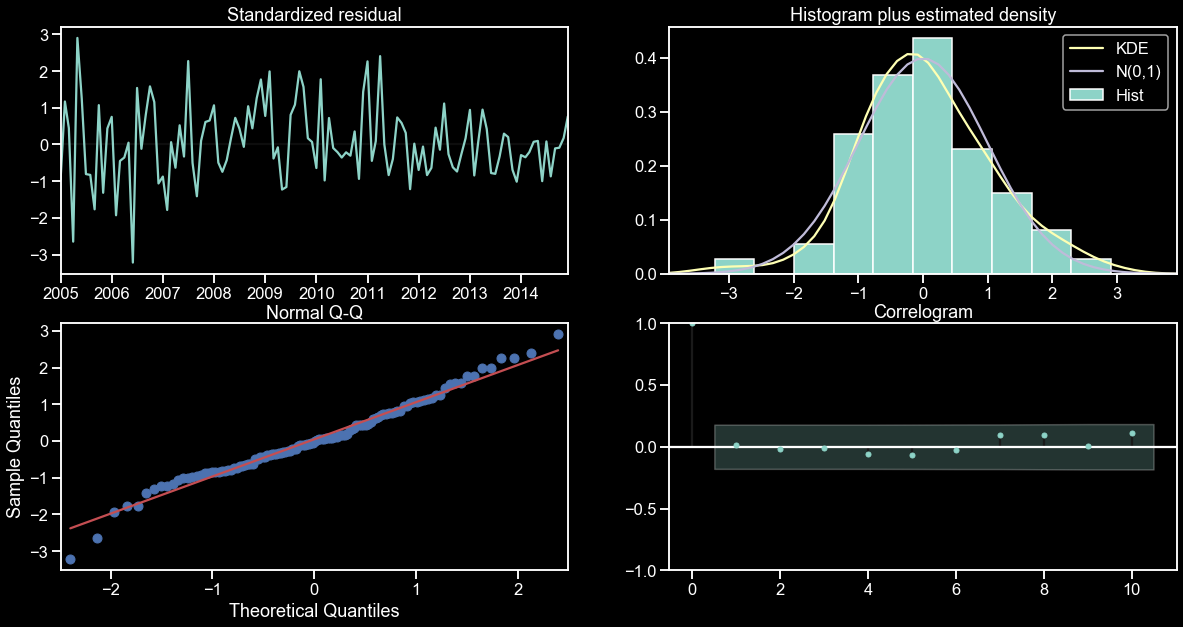

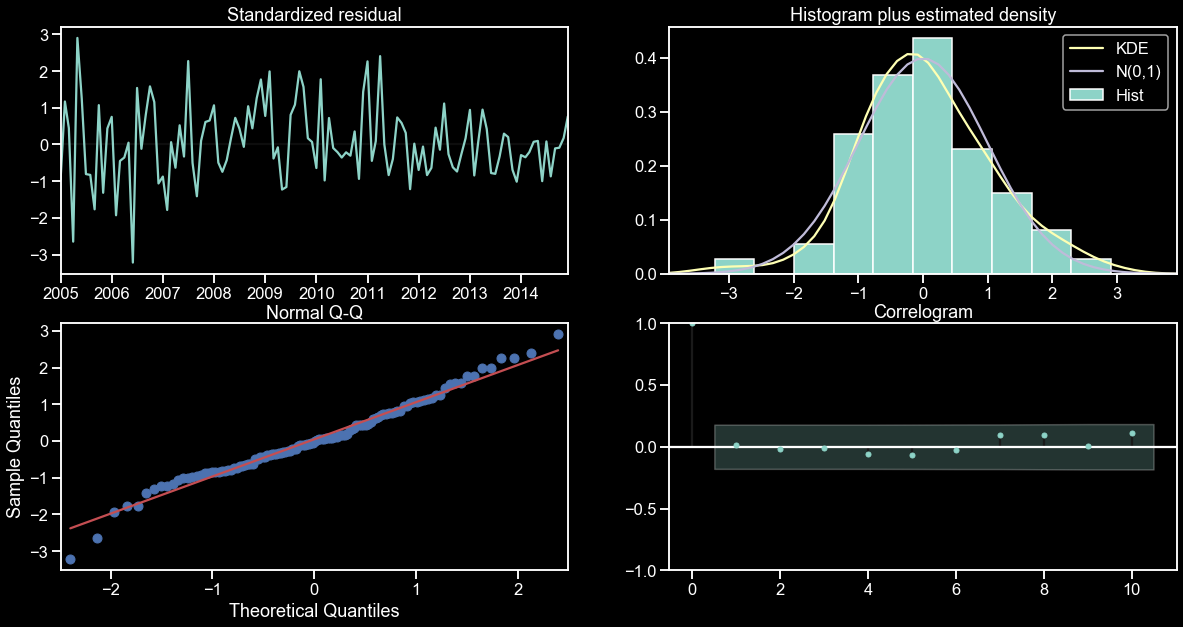

In [194]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

The QQ plot looks pretty tightly bound to the line, the histogram is not too far off from the Gaussian curve. 

---

In [206]:
model5 = auto_arima(master['2000':'2014'], trace=True, seasonal=True, m=12, D=1,
                    suppress_warnings=True,information_criterion='oob', out_of_sample_size=45,
                    error_action='ignore', approximation=False, random_state=42)
fitted = model5.fit(master['2000':'2014'], disp=0)

Performing stepwise search to minimize oob
Fit ARIMA(2,0,2)x(1,1,1,12) [intercept=True]; AIC=800.334, BIC=822.634, Time=1.439 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=852.469, BIC=858.044, Time=0.045 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=832.900, BIC=844.050, Time=0.340 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=822.817, BIC=833.967, Time=0.555 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=850.547, BIC=853.335, Time=0.031 seconds
Fit ARIMA(0,0,0)x(1,1,0,12) [intercept=True]; AIC=849.339, BIC=857.702, Time=0.254 seconds
Fit ARIMA(0,0,0)x(0,1,1,12) [intercept=True]; AIC=839.014, BIC=847.376, Time=0.444 seconds
Near non-invertible roots for order (0, 0, 0)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
F

In [207]:
fitted.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 0, 1),
 'out_of_sample_size': 45,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (1, 1, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  132
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -392.003
Date:                            Mon, 18 May 2020   AIC                            796.006
Time:                                    22:16:54   BIC                            812.730
Sample:                                01-01-2004   HQIC                           802.798
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0003      0.001      0.260      0.794      -0.002       0.003
ar.L1          0.9432      0.059   

Text(0.5, 1.0, 'SARIMA MODEL (1,0,1)x(1,1,1,12)')

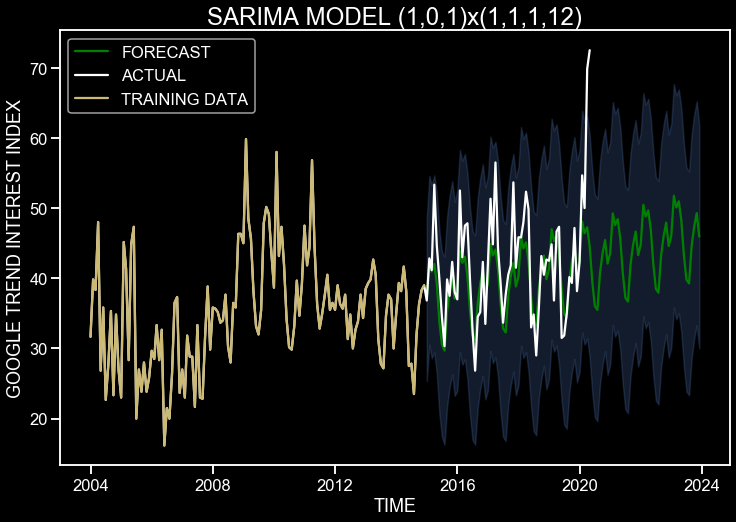

In [212]:
model7 = SARIMAX(master['2000':'2014'], order=(1,0,1), seasonal_order=(1,1,1,12),
                trend='t')
fit = model7.fit()
print(fit.summary())
forecast = fit.forecast(108)
print('Forecasting 108 months into the future from the\ntraining data (2015-2024).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
forecasted = pred.predicted_mean
prediction = fit.get_forecast(steps=108)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2000':].index,
             y=master['2000':]['interest'], color='w')
sns.lineplot(x=master['2000':'2014'].index,
             y=master['2000':'2014']['interest'], color='y')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='b', alpha=0.25)
plt.legend(['FORECAST','ACTUAL','TRAINING DATA'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL (1,0,1)x(1,1,1,12)', size=24)

This model's AIC score is:  796.0055445660987
This model's BIC score is:  812.7304950227909
This model's RMSE on test data is:  11.906685939049693


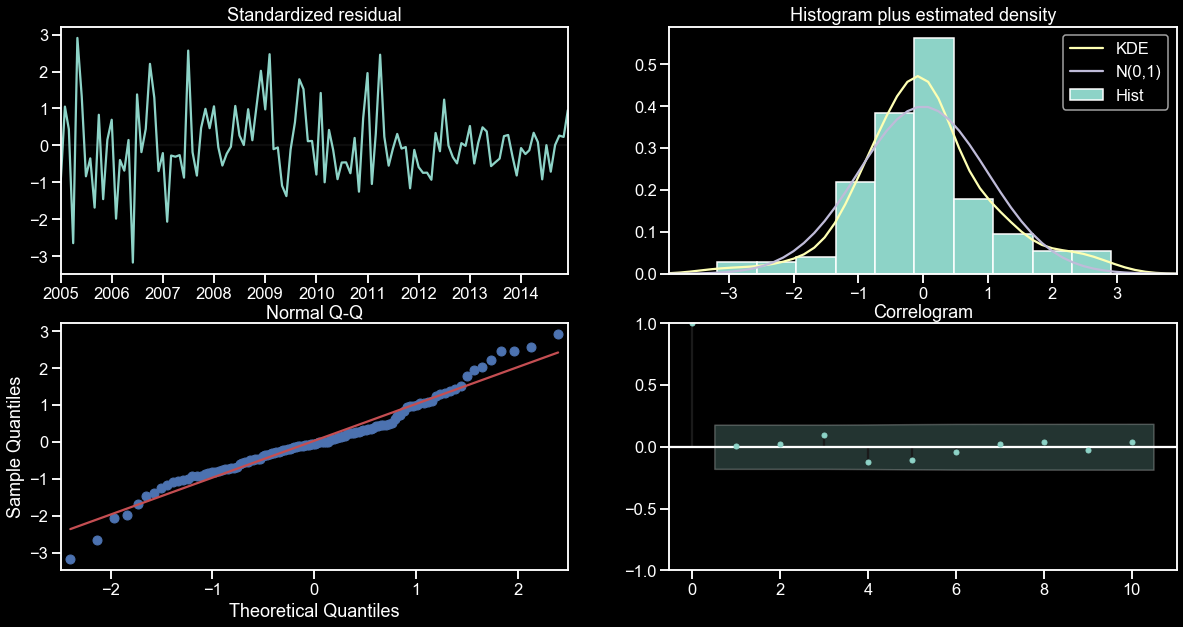

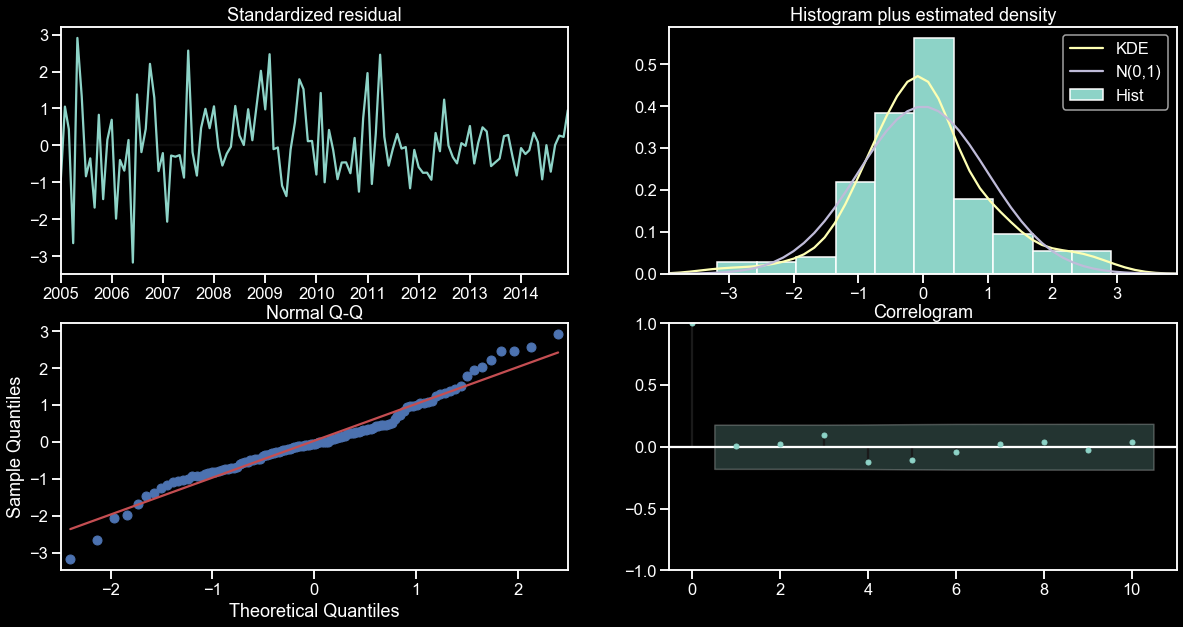

In [213]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

### Final model parameters (1,0,1)x(1,1,1,52)

---

# LSTM Modeling